In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel("C:/Users/Rutvik Suryawanshi/Downloads/archive (3)/global_superstore_2016.xlsx")

# Display basic information
print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Row ID          51290 non-null  int64         
 1   Order ID        51290 non-null  object        
 2   Order Date      51290 non-null  datetime64[ns]
 3   Ship Date       51290 non-null  datetime64[ns]
 4   Ship Mode       51290 non-null  object        
 5   Customer ID     51290 non-null  object        
 6   Customer Name   51290 non-null  object        
 7   Segment         51290 non-null  object        
 8   Postal Code     9994 non-null   float64       
 9   City            51290 non-null  object        
 10  State           51290 non-null  object        
 11  Country         51290 non-null  object        
 12  Region          51290 non-null  object        
 13  Market          51290 non-null  object        
 14  Product ID      51290 non-null  object        
 15  Ca

In [4]:
# Handle missing values
df.fillna(df.mean(numeric_only=True), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Detect and remove outliers using IQR
Q1 = df.quantile(0.25, numeric_only=True)
Q3 = df.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1

df = df[~((df.select_dtypes(include=['number']) < (Q1 - 1.5 * IQR)) | 
          (df.select_dtypes(include=['number']) > (Q3 + 1.5 * IQR))).any(axis=1)]

In [6]:
# Compute basic statistics
print(df.describe())

# Compute correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
print(correlation_matrix)

             Row ID                     Order Date  \
count  28949.000000                          28949   
mean   21948.486614  2014-05-16 22:20:27.897336832   
min        1.000000            2012-01-01 00:00:00   
25%     9299.000000            2013-06-27 00:00:00   
50%    19556.000000            2014-07-15 00:00:00   
75%    29785.000000            2015-05-26 00:00:00   
max    51290.000000            2015-12-31 00:00:00   
std    15054.223873                            NaN   

                           Ship Date   Postal Code         Sales  \
count                          28949  2.894900e+04  28949.000000   
mean   2014-05-20 22:39:42.921689856  5.519038e+04    100.203369   
min              2012-01-03 00:00:00  5.519038e+04      1.956000   
25%              2013-07-02 00:00:00  5.519038e+04     30.240000   
50%              2014-07-19 00:00:00  5.519038e+04     62.700000   
75%              2015-05-30 00:00:00  5.519038e+04    135.744000   
max              2016-01-07 00:00:00 

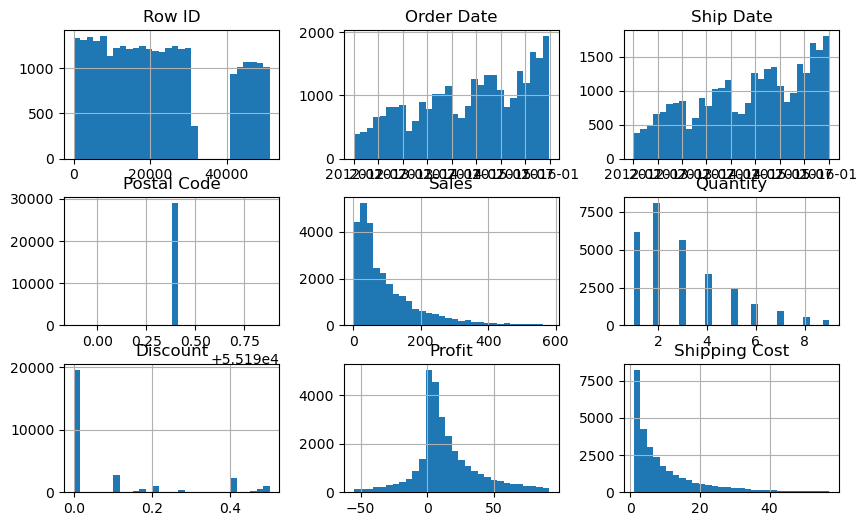

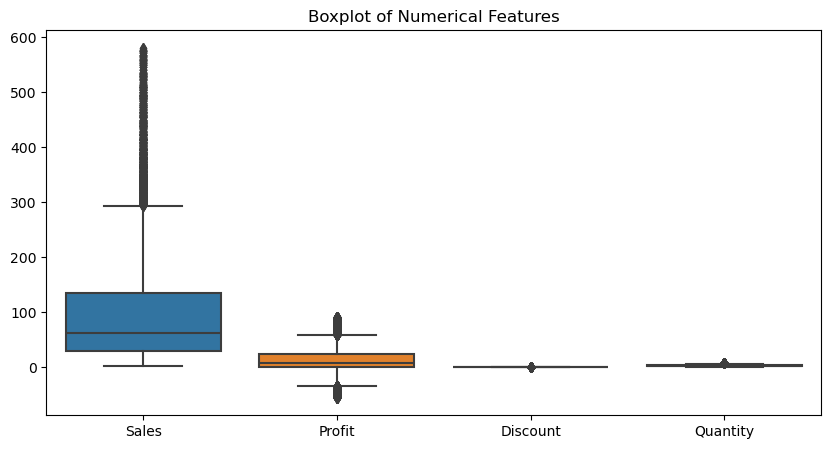

C:\Users\Rutvik Suryawanshi\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


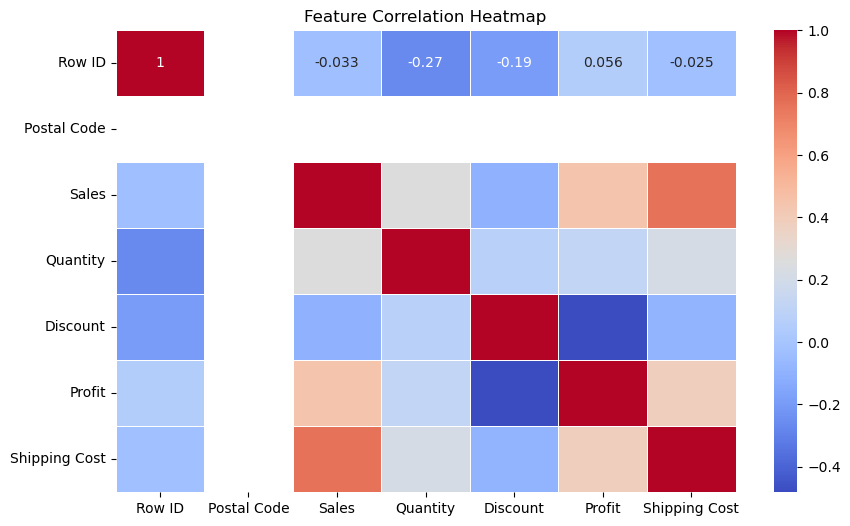

In [7]:
# Histogram for numerical features
df.hist(figsize=(10, 6), bins=30)
plt.show()

# Boxplots to detect outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df[['Sales', 'Profit', 'Discount', 'Quantity']])
plt.title("Boxplot of Numerical Features")
plt.show()

# Heatmap for correlation
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()